In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import differential_evolution
import pandas as pd

In [2]:
def forward(Estart, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(Estart)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Ew)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
    return win_prob_r1

In [3]:
def reverse(Estart, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(-Estart)
        el.append(-Ew)
        for i in range(region[0], region[1]):
            if i == region[1]-j-1:
                el.append(-Emm)
            else:
                el.append(-Ec)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][0][1])
        
    return win_prob_r1

In [4]:
def cut(Estart, Ec, region, totlen, Emm, Ecut, Estop):
    els = []
    for j in range(totlen):
        el = []
        el.append(Ec)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Estop)
        els.append(el)
    plsm = []
    for j in range(len(els)):
        pls = []
        pls.append([0, 0, 0])
        pls.append([0, 1, 0])
        for i in range(len(els[j])-1):
            p = []
            z = 1 + np.exp(-els[j][i])+np.exp(els[j][i+1])
            p.append((1/(1+np.exp(Ecut))*np.exp(-els[j][i])/z))
            p.append((1/(1+np.exp(Ecut))*1/z))
            p.append((1/(1+np.exp(Ecut))*np.exp(els[j][i+1])/z))
            pls.append(p)
        pls.append([0, 1, 0])
        pls.append([0, 0, 0])
        plsm.append(pls)
    matrix_m = []
    for j in range(len(plsm)):
        matrix = []
        for i in range(len(plsm[j])-2):
            line = []
            if i == len(plsm[j])-3:
                pcut = np.exp(Ecut)/(1+np.exp(Ecut))
                line.append(0)
                for l in range(len(plsm[j])-4):
                    line.append(pcut)
                line.append(1)
                matrix.append(line)
            else:
                for k in range(len(plsm[j])-2):
                    if k == i - 1:
                        line.append(plsm[j][k+1][2])
                    elif k == i:
                        line.append(plsm[j][k+1][1])
                    elif k == i + 1:
                        line.append(plsm[j][k+1][0])
                    else:
                        line.append(0)
                matrix.append(line)
        matrix_m.append(matrix)
    matrix_m = np.array(matrix_m)
    powered_matrix_array = []
    for j in range(len(matrix_m)):
        powered_matrix_array.append(LA.matrix_power(matrix_m[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
        
    return win_prob_r1

In [5]:
def cutrate(Estart, Ec, Ew1, Ew2, Ew3, Ew4, Ew5, Emm, Ecut, stop1, stop2, stop3, stop4, stop5):
    totlen = 32
    region1 = [0, int(stop1)]
    region2 = [int(stop1), int(stop2)]
    region3 = [int(stop2), int(stop3)]
    region4 = [int(stop3), int(stop4)]
    region5 = [int(stop4), int(stop5)]
    region6 = [int(stop5), totlen]
    Estop = -1000000
    probs = [forward(Estart, Ec, Ew1, region1, totlen, Emm), reverse(Ec, Ec, Ew1, region1, totlen, Emm),
             forward(Ec, Ec, Ew2, region2, totlen, Emm), reverse(Ec, Ec, Ew2, region2, totlen, Emm),
             forward(Ec, Ec, Ew3, region3, totlen, Emm), reverse(Ec, Ec, Ew3, region3, totlen, Emm),
             forward(Ec, Ec, Ew4, region4, totlen, Emm), reverse(Ec, Ec, Ew4, region4, totlen, Emm),
             forward(Ec, Ec, Ew5, region5, totlen, Emm), reverse(Ec, Ec, Ew5, region5, totlen, Emm),
        cut(Ec, Ec, region6, totlen, Emm, Ecut, Estop)]
    plsm = []
    for i in range(len(probs[0])):
        pls = []
        pls.append([0, 0, 0])
        pls.append([0, 1, 0])
        for j in range(len(probs)):
            pls.append([1-probs[j][i], 0, probs[j][i]])
        pls.append([0, 1, 0])
        pls.append([0, 0, 0])
        plsm.append(pls)

    matrix_array = []
    for j in range(len(plsm)):
        matrix = []
        for i in range(len(plsm[j])-2):
            line = []
            for k in range(len(plsm[j])-2):
                if k == i - 1:
                    line.append(plsm[j][k+1][2])
                elif k == i:
                    line.append(plsm[j][k+1][1])
                elif k == i + 1:
                    line.append(plsm[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)

    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 100000))

    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
        
    return win_prob_r1

In [7]:
df1 = pd.read_csv('C:/Users/asetk/OneDrive/Desktop/CRISPR Paper/In-Vivo Data/Finkelstein 2C.csv')

In [8]:
data_y = df1['Normalized'].tolist()[3:]

In [9]:
bounds = [(1, 12), (0.5, 3), (0, -5), (0, -8), (-1, -6), (-1, -6), (-1, -8), 
          (-12, -16), (-7, -15),
          (6, 9), (12, 15), (18, 21), (24, 27), (30.7, 31.3)]

In [10]:
def minimizee(x):
    pick = range(0,32)
    data_cas3 = [0.029798178999999998, 0.009308698,
    0.010674218000000001,0.001973125,0.004189034,0.678525851,    0.004485775,0.006461944,0.01281147,
    0.00311395,0.003823688,0.48189066700000005,0.0042857,  0.009308698,
    0.04702696,0.007934762, 0.011694119,0.872073012,0.010920536000000002, 0.010920536000000002, 0.050358232999999995,
  0.010198126,  0.018881329,  0.726590935,  0.020685403,  0.023184796,  0.043916055999999995,  0.017234596,  0.025986187999999997,
  1.0,  0.089077282,  0.312391491]
    fit_probs = np.take(cutrate(x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8],
                               x[9], x[10], x[11], x[12], x[13]), pick)
    return np.sum(np.square(np.subtract(data_cas3, fit_probs)))

In [11]:
result = differential_evolution(func = minimizee, bounds = bounds, maxiter = 50, popsize = 10)

In [12]:
new_x = result.x

In [ ]:
#fitting will find results or you can use cell below for my values

In [16]:
new_x

array([  5.77416688,   2.29990665,  -2.97021072,  -4.49957985,
        -3.15928545,  -3.64974156,  -2.15313181, -15.90820262,
       -14.39533467,   7.87770559,  13.09688507,  19.65451567,
        25.14944714,  31.21999534])

In [13]:
full_length = cutrate(new_x[0], new_x[1], new_x[2], new_x[3], new_x[4], new_x[5], new_x[6], new_x[7], new_x[8],
                     new_x[9], new_x[10], new_x[11], new_x[12], new_x[13])
x = np.arange(1, 37, 1)

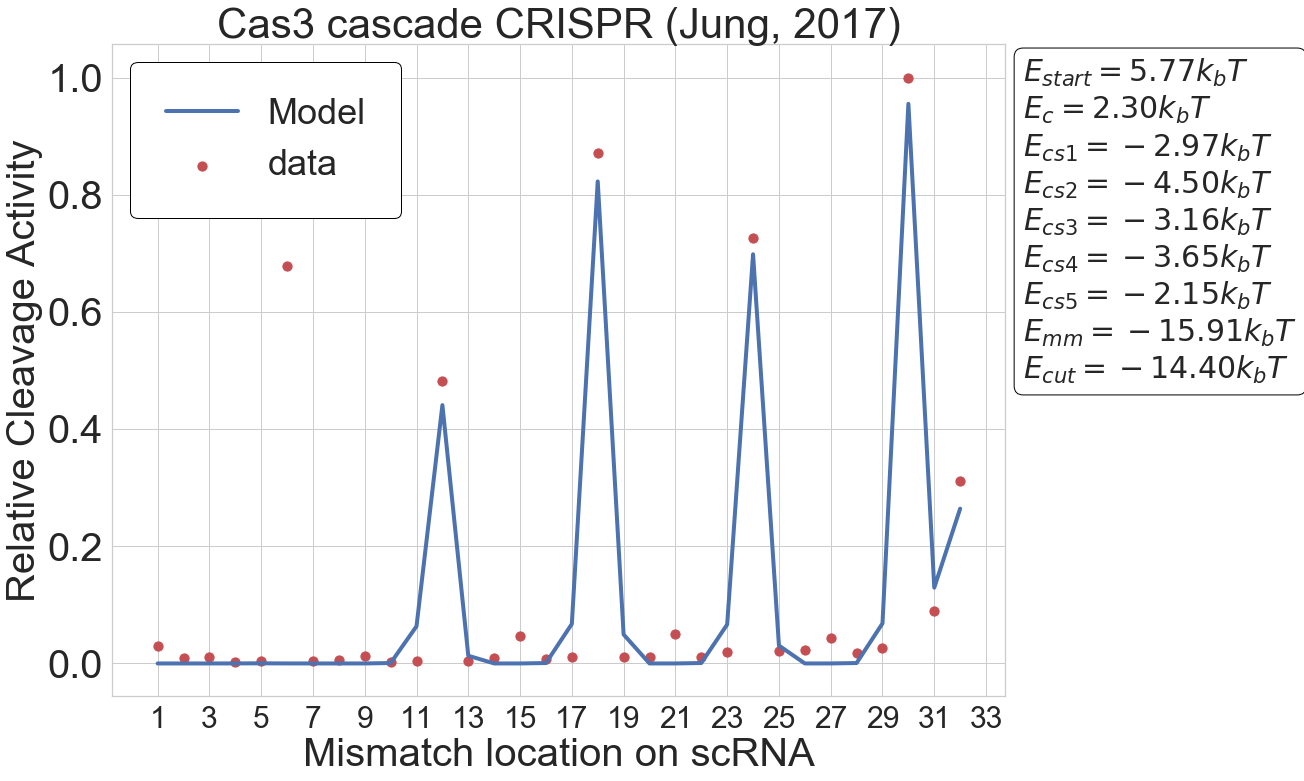

In [15]:
ax = plt.axes()
plt.plot(x[:32], full_length, lw = 4, label = 'Model')
plt.scatter(x[:32], data_y, label = 'data', c ='r', s = 85)
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax.set_title('Cas3 cascade CRISPR (Jung, 2017)', fontsize = 42)
plt.ylabel('Relative Cleavage Activity', fontsize = 40)
plt.xlabel('Mismatch location on scRNA', fontsize = 40)
plt.xticks(np.arange(1, 34, 2), fontsize = 30)
plt.yticks(fontsize = 40)
plt.rcParams["figure.figsize"] = (16, 12)
first_legend = plt.legend(loc= 'upper left', fancybox =True, borderpad = 1, edgecolor = 'black', fontsize = 36, framealpha = 1)
props = dict(boxstyle='round', facecolor='white', alpha=1, edgecolor = 'black')
textstr = '\n'.join((
    r'$E_{start}=%.2f$' % (new_x[0], ) + '$k_bT$',
    r'$E_{c}=%.2f$' % (new_x[1], ) + '$k_bT$',
    r'$E_{cs1}=%.2f$' % (new_x[2], ) + '$k_bT$', 
    r'$E_{cs2}=%.2f$' % (new_x[3], ) + '$k_bT$', r'$E_{cs3}=%.2f$' % (new_x[4], ) + '$k_bT$',
    r'$E_{cs4}=%.2f$' % (new_x[5], ) + '$k_bT$', r'$E_{cs5}=%.2f$' % (new_x[6], ) + '$k_bT$',
    r'$E_{mm}=%.2f$' % (new_x[7], ) + '$k_bT$', r'$E_{cut}=%.2f$' % (new_x[8], ) + '$k_bT$'))
ax.text(1.02, 0.98, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()